In [1]:
import numpy as np
import matplotlib.pyplot as plt
#yeni bir pencerede açılmış gibi interaktif bir grafik verir
%matplotlib notebook 

### Örnek 1 (Basit bir figür oluşturup Line2D çizdirmek)

<IPython.core.display.Javascript object>


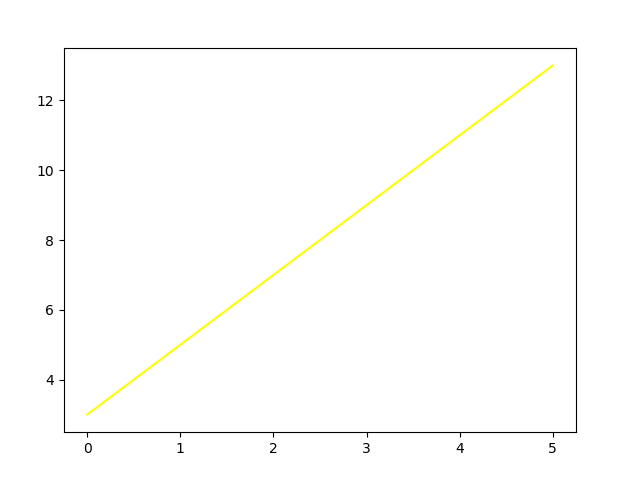

matplotlib.figure.Figure

In [9]:
#bir figür oluşturup dönen figür objesini yakaladık
fig1 = plt.figure()
type(fig1)

In [10]:
#figüre bir axes ekledik ve dönen bu Axes objesini yakaladk
ax1 = fig1.add_axes([0.1,0.1,0.8,0.8])
type(ax1)

matplotlib.axes._axes.Axes

In [11]:
x = np.linspace(0,5,20)
y = 2*x+3

#ax1 axesine bir çizgi çizdirdik. Bize döndüğü değer bir liste olacak
l1 = ax1.plot(x,y)
type(l1)

list

In [12]:
#Bu listenin ilk elemanı ise bizim çizdirdiğimiz çizgi
type(l1[0])

matplotlib.lines.Line2D

In [13]:
#çizgimizin rengini değiştiriyoruz
l1[0].set_color("yellow")

### Örnek 2 - Bir Figur İçinde 2 farklı Axes Oluşturmak

In [7]:
#tekrar satır içi görünüme geçmesi için
%matplotlib inline 

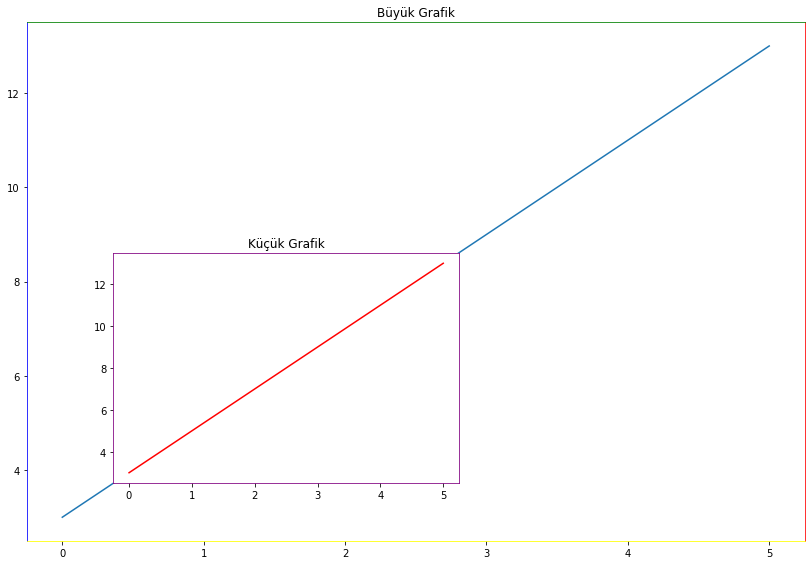

In [8]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_axes([0.1,0.1,0.9,0.9])
ax2 = fig.add_axes([0.2,0.2,0.4,0.4])

x = np.linspace(0,5,20)
y = 2*x+3

ax1.plot(x,y)
ax2.plot(x,y,"r")

#ax1'in çerçeve renklerini değiştiriyoruz
ax1.spines["bottom"].set_color("yellow")
ax1.spines["top"].set_color("green")
ax1.spines["right"].set_color("red")
ax1.spines["left"].set_color("blue")

#ax2'nin çerçeve renklerini değiştiriyoruz
ax2.spines["bottom"].set_color("purple")
ax2.spines["top"].set_color("purple")
ax2.spines["right"].set_color("purple")
ax2.spines["left"].set_color("purple")

ax1.set_title("Büyük Grafik")
ax2.set_title("Küçük Grafik")

plt.show()

### Örnek 3 - Üst üste binan axesleri görünür yapmak

In [9]:
%matplotlib inline

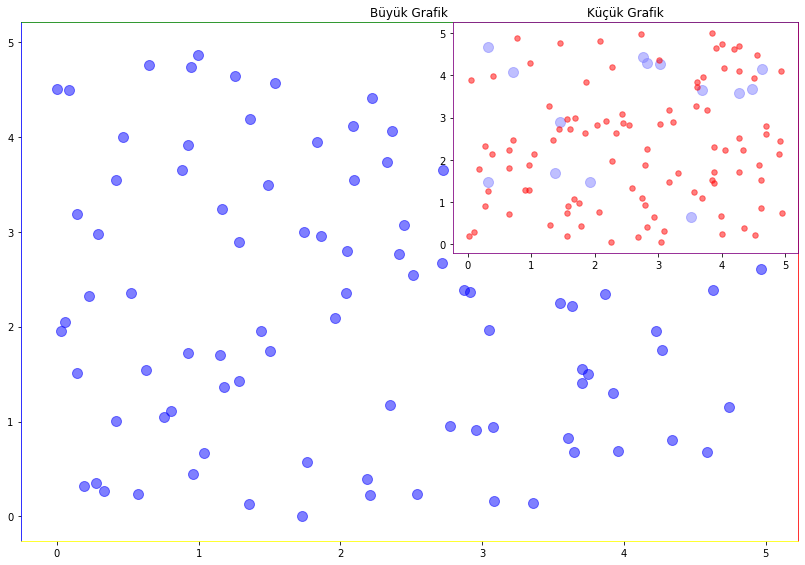

In [10]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_axes([0.1,0.1,0.9,0.9])
ax2 = fig.add_axes([0.6,0.6,0.4,0.4])

#ax1'in çerçeve renklerini değiştiriyoruz
ax1.spines["bottom"].set_color("yellow")
ax1.spines["top"].set_color("green")
ax1.spines["right"].set_color("red")
ax1.spines["left"].set_color("blue")

#ax2'nin çerçeve renklerini değiştiriyoruz
ax2.spines["bottom"].set_color("purple")
ax2.spines["top"].set_color("purple")
ax2.spines["right"].set_color("purple")
ax2.spines["left"].set_color("purple")

ax1.set_title("Büyük Grafik")
ax2.set_title("Küçük Grafik")

x1 = np.random.uniform(0,5,100)
y1 = np.random.uniform(0,5,100)

x2 = np.random.uniform(0,5,100)
y2 = np.random.uniform(0,5,100)

ax1.scatter(x1,y1,s=100,c="b",alpha=0.5)
ax2.scatter(x2,y2,s=30,c="r",alpha=0.5)

#alttaki satır ile üst üste binme sorununu çözmüş oluyoruz. ax2.path bize ax2'nin oluştuğu parçayı veriyor.
#Burada ax2'nin oluştuğu parça bir dörtgen(rectangle). Bunun saydamlığını yükseltiyoruz
ax2.patch.set_alpha(0.5)

plt.show()

### Örnek 4 - Çift Eksen Çizdirmek
Bir grafik üzerine birden fazla fonksiyon çizdirmek istiyorum. Çizilecek kısımda bu iki fonksiyonun aldığı değerler birbirinden çok uzaksa grafiklerden küçük olan, büyük olan tarafından baskılanacaktır. Örnek olarak x = 5 için birinci fonksiyon y=13 değerini alırken 2.fonksiyon y = 136933 değerini alabilir. Bu durumda grafikte sadece büyük olan grafiğin yorumlanması mümkün olacak, küçük olan baskılanacaktır.

In [11]:
x = np.linspace(1,10,50)
y1 = x
y2 = np.exp(x)

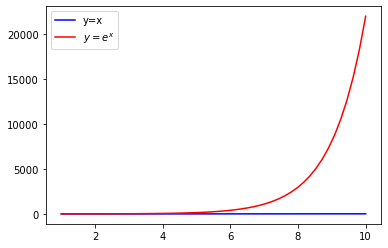

In [18]:
fig,ax = plt.subplots()

ax.plot(x,y1,"b",label="y=x")
ax.plot(x,y2,"r",label="$y=e^{x}$")
ax.legend()
ax.plot()

plt.show()

Görüldüğü y=x fonksiyonumuz neredeyse düz yatay bir çizgi olarak gözüküyor. Bu sorunu çözmek için 2 tane y ekseni kullanacağız

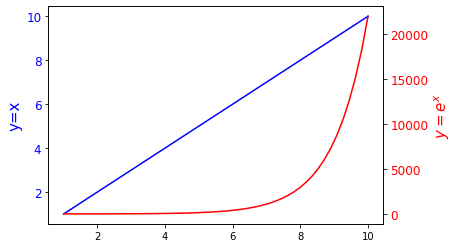

In [32]:
fig,ax = plt.subplots()

#lineer fonksiyonumuzu çizdik
ax.plot(x,y1,"b")
#label atama
ax.set_ylabel("y=x",color="blue",fontsize=15)

#bu kısım sadece daha iyi bir görünüm için
for label in ax.get_yticklabels():
    label.set_color("blue")
    label.set_fontsize(12)

#x değerlerinin karşılığı olan y'ler için 2. bir y ekseni yarattı.
ax_exp = ax.twinx()

#2. y ekseni ve ortak x ekseni için diğer fonksiyonu çiziyoruz
ax_exp.plot(x,y2,"r")
#label atama
ax_exp.set_ylabel("$y=e^{x}$",color="red",fontsize=15)

#bu kısım sadece daha iyi bir görünüm için
for label in ax_exp.get_yticklabels():
    label.set_color("red")
    label.set_fontsize(12)
        
plt.show()

### Örnek 5 - İki Eğri Arasını Doldurma

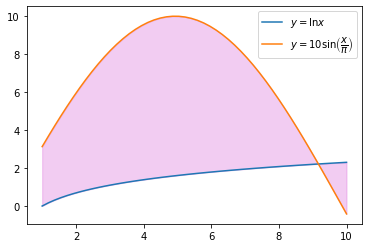

In [16]:
%matplotlib inline
x = np.linspace(1,10,50)
y1 = np.log(x)
y2 = 10*np.sin(x/(np.pi))

fig,ax = plt.subplots()

#iki eğri arasını boyuyor
ax.fill_between(x,y1,y2,color="m",alpha=0.2)

ax.plot(x,y1,label=r"$y=\ln x$")
ax.plot(x,y2,label=r"$y=10\sin \left( \dfrac {x}{\pi }\right) $")

ax.legend()
plt.show()

### Örnek 6 - 3 Boyutlu Grafik Çizdirme

In [2]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

<IPython.core.display.Javascript object>


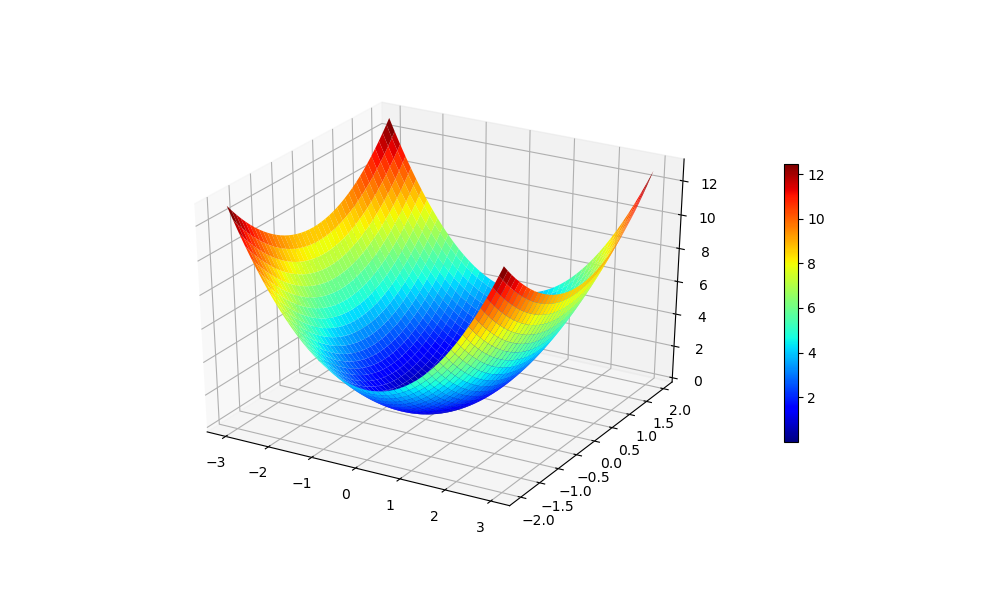

In [14]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111,projection="3d")

delta = 0.025
x = np.arange(-3.0,3.0,delta)
y = np.arange(-2.0,2.0,delta)

X,Y = np.meshgrid(x,y)
Z = X**2 + Y**2

surf = ax.plot_surface(X,Y,Z,cmap="jet")
fig.colorbar(surf,shrink=0.6)

plt.show()